### **HARSHITH N GOWDA**

gowdaharshith683@gmail.com

### **CUSTOMER SEGMENTATION**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
sns.set_palette("rocket")

In [36]:
train_df = pd.read_csv('/content/Train.csv')
test_df = pd.read_csv('/content/Test.csv')

In [37]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [38]:
train_df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [39]:
train_df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [40]:
train_df.duplicated().sum()

0

In [41]:
def forward_fill(df):
    df_filled = df.apply(lambda col: col.fillna(method='ffill') if col.isnull().any() else col, axis=0)
    return df_filled

train1  = forward_fill(train_df)

In [42]:
train1.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [43]:
train=train1.drop(['ID','Var_1'],axis=1)
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.0,Low,7.0,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


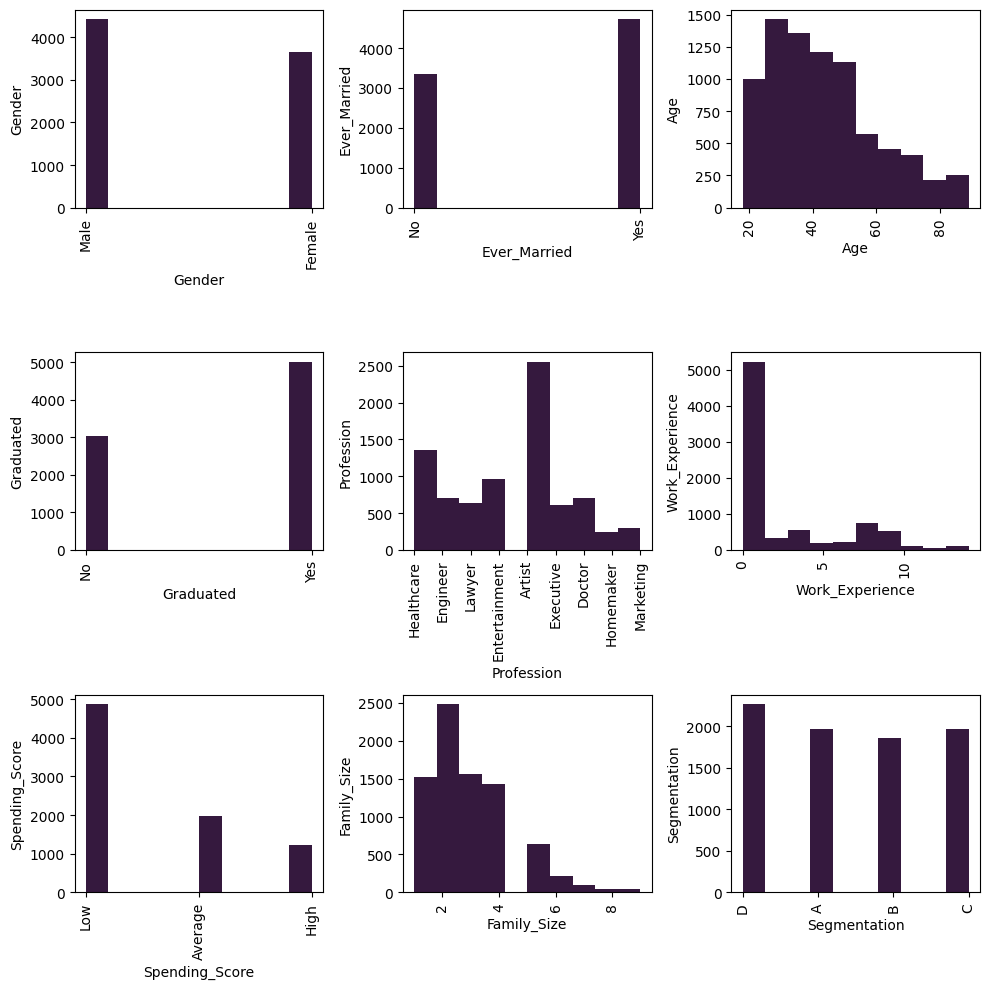

In [44]:
plt.subplots(nrows=3,ncols=3,figsize = (10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.hist(train.iloc[:,i])
    plt.xlabel(train.columns[i])
    plt.ylabel(train.columns[i])
    plt.xticks(rotation=90)
    plt.tight_layout()


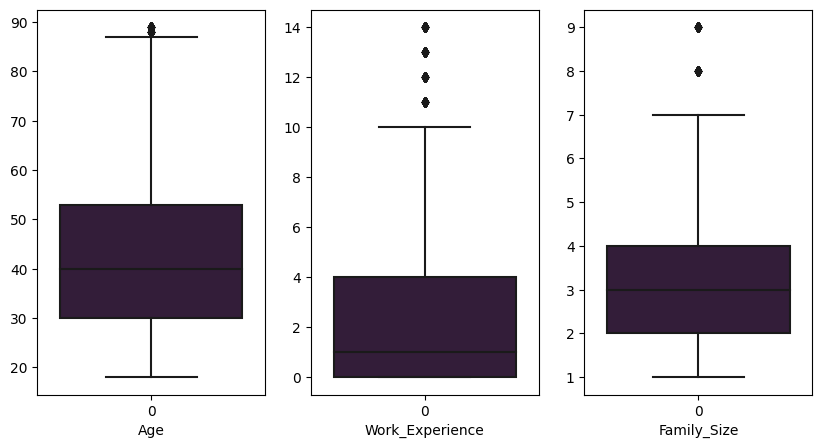

In [45]:
plt.subplots(nrows=1,ncols=3,figsize = (10,5))
k=0
for i in range(train.shape[1]):
    #check for numerical feature
    if type(train.iloc[0,i]) == np.int64 or type(train.iloc[0,i]) == np.float64:
        plt.subplot(1,3,k+1)
        sns.boxplot(train.iloc[:,i])
        plt.xlabel(train.columns[i])
        k +=1

In [46]:
data_encoded = pd.get_dummies(train)

(25.5, -0.5)

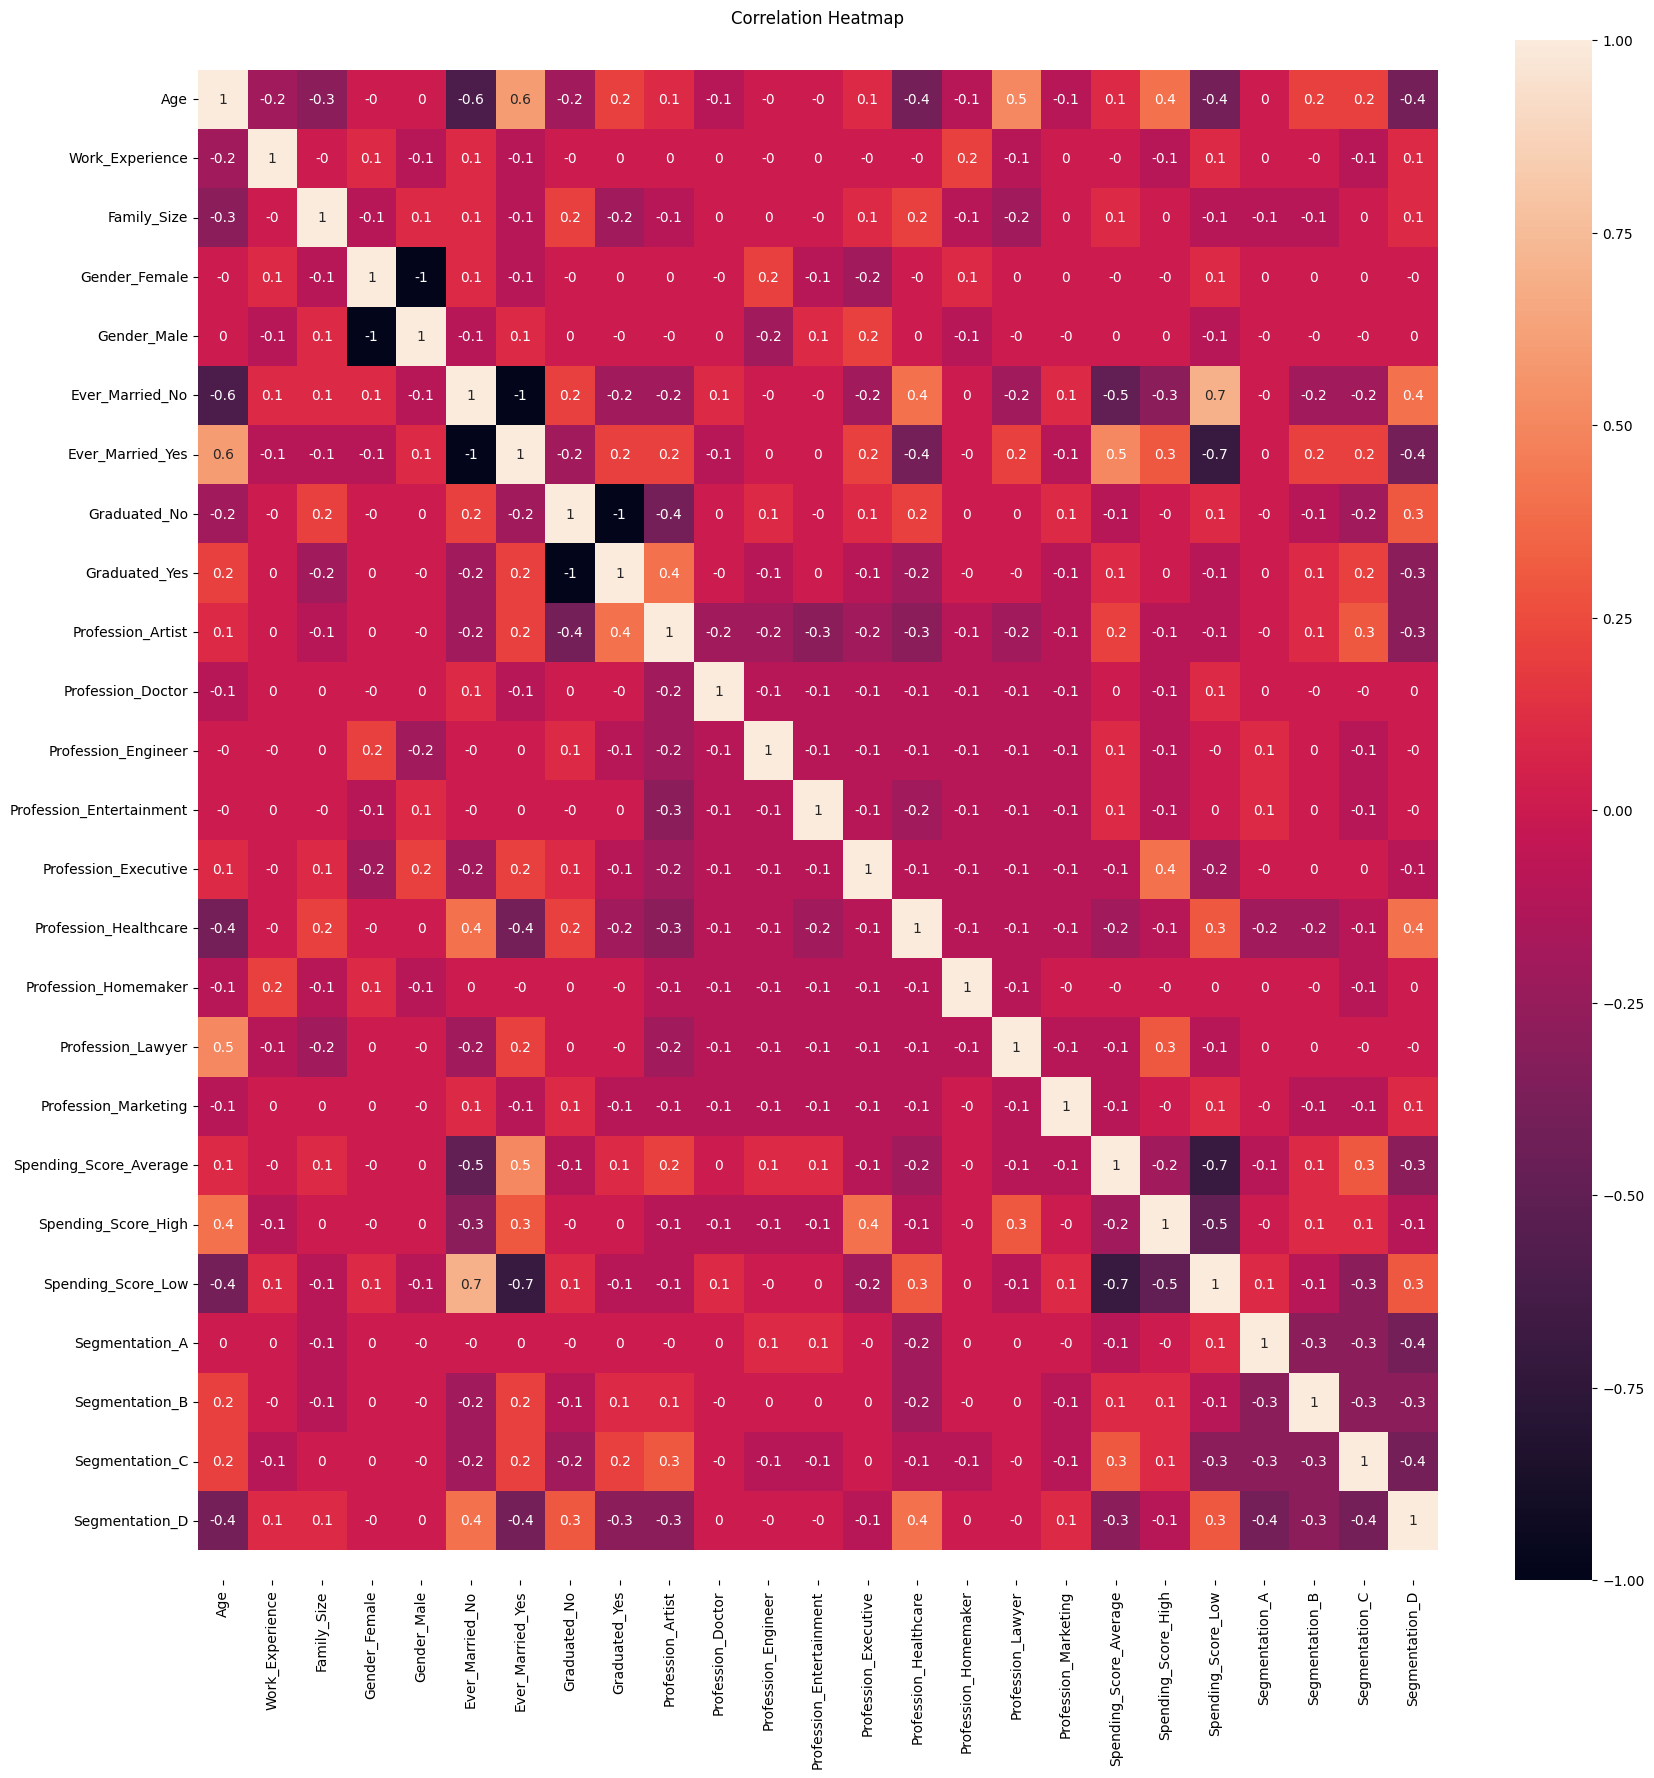

In [47]:
data_corr = data_encoded.corr() #correlation matrix
plt.figure(figsize=(20, 20)) #initialize figure
heatmap = sns.heatmap(data_corr.round(1), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#better display of heatmap
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

In [48]:
data_corr['Segmentation_A'].sort_values(ascending=False)[1:10]

Profession_Entertainment    0.117090
Spending_Score_Low          0.097750
Profession_Engineer         0.091904
Profession_Lawyer           0.049820
Age                         0.049626
Profession_Doctor           0.033922
Work_Experience             0.031513
Profession_Homemaker        0.021462
Gender_Female               0.009627
Name: Segmentation_A, dtype: float64

In [49]:
data_corr['Segmentation_B'].sort_values(ascending=False)[1:10]


Ever_Married_Yes          0.168244
Age                       0.154935
Graduated_Yes             0.116410
Profession_Artist         0.112398
Spending_Score_Average    0.092726
Spending_Score_High       0.085547
Profession_Executive      0.049935
Profession_Engineer       0.029077
Profession_Lawyer         0.014786
Name: Segmentation_B, dtype: float64

In [50]:
data_corr['Segmentation_C'].sort_values(ascending=False)[1:10]

Spending_Score_Average    0.282550
Profession_Artist         0.274843
Ever_Married_Yes          0.241279
Graduated_Yes             0.232098
Age                       0.193101
Spending_Score_High       0.087161
Family_Size               0.046389
Profession_Executive      0.030974
Gender_Female             0.017690
Name: Segmentation_C, dtype: float64

In [51]:
data_corr['Segmentation_D'].sort_values(ascending=False)[1:10]

Profession_Healthcare    0.449191
Ever_Married_No          0.390291
Spending_Score_Low       0.339896
Graduated_No             0.334667
Family_Size              0.148055
Profession_Marketing     0.126903
Work_Experience          0.063501
Gender_Male              0.037299
Profession_Homemaker     0.032972
Name: Segmentation_D, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [53]:
train_encoded = pd.get_dummies(train)
train_final  = train_encoded.drop(['Segmentation_A','Segmentation_B','Segmentation_C','Segmentation_D'],axis=1)
train_final

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,38,1.0,3.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,67,1.0,1.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,40,0.0,6.0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
8064,35,3.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
8066,27,1.0,4.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [54]:
label_encoder = LabelEncoder()

target_encoded = label_encoder.fit_transform(train['Segmentation'])
target_encoded

array([3, 0, 1, ..., 3, 1, 1])

In [55]:
x_train, x_test, y_train, y_test = train_test_split(train_final,target_encoded,test_size=0.2,stratify = target_encoded,random_state=42)

### **classification**

RANDOM FOREST CLASSIFIER

In [56]:
forest_model = RandomForestClassifier(random_state =42)
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [2,3,4,5,10]
}


grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)


print('The best model provided from the gridsearch is:', grid_search.best_estimator_)


predictions = grid_search.predict(x_test)


train_score = grid_search.score(x_train, y_train)
print('Accuracy of model on train set:',train_score)


test_score = accuracy_score(y_test, predictions)
print('Accuracy of model on test set:',test_score)

The best model provided from the gridsearch is: RandomForestClassifier(max_depth=10, random_state=42)
Accuracy of model on train set: 0.6775643012085528
Accuracy of model on test set: 0.5421313506815365


              precision    recall  f1-score   support

           0       0.43      0.43      0.43       394
           1       0.46      0.33      0.38       372
           2       0.58      0.61      0.60       394
           3       0.63      0.76      0.69       454

    accuracy                           0.54      1614
   macro avg       0.53      0.53      0.52      1614
weighted avg       0.53      0.54      0.53      1614



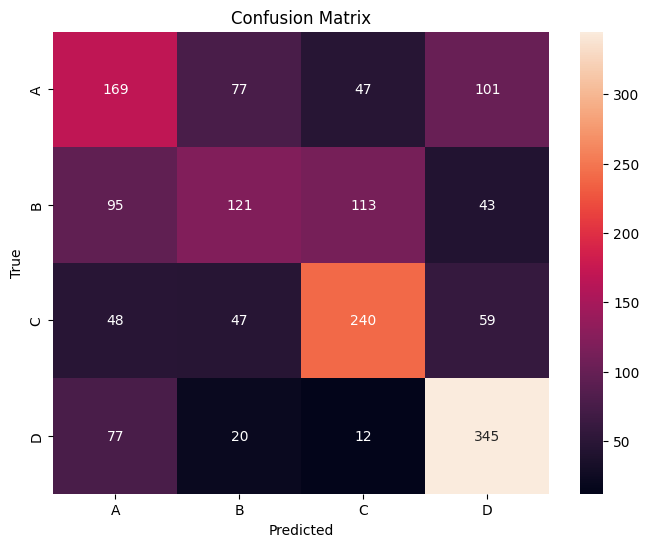

In [57]:

print(classification_report(y_test,predictions))

#confusion matrix
cm = confusion_matrix(y_test, predictions)

class_labels = ['A','B','C','D']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

ADA BOOST

In [58]:

classifier = AdaBoostClassifier(estimator=forest_model,random_state=42)


classifier.fit(x_train, y_train)


predictions = classifier.predict(x_test)


train_score = classifier.score(x_train, y_train)
print('Accuracy of model on train set:',train_score)

test_score = accuracy_score(y_test, predictions)
print('Accuracy of model on test set:',test_score)

Accuracy of model on train set: 0.9355438487759529
Accuracy of model on test set: 0.4721189591078067


              precision    recall  f1-score   support

           0       0.37      0.36      0.37       394
           1       0.35      0.32      0.33       372
           2       0.50      0.48      0.49       394
           3       0.61      0.68      0.64       454

    accuracy                           0.47      1614
   macro avg       0.46      0.46      0.46      1614
weighted avg       0.47      0.47      0.47      1614



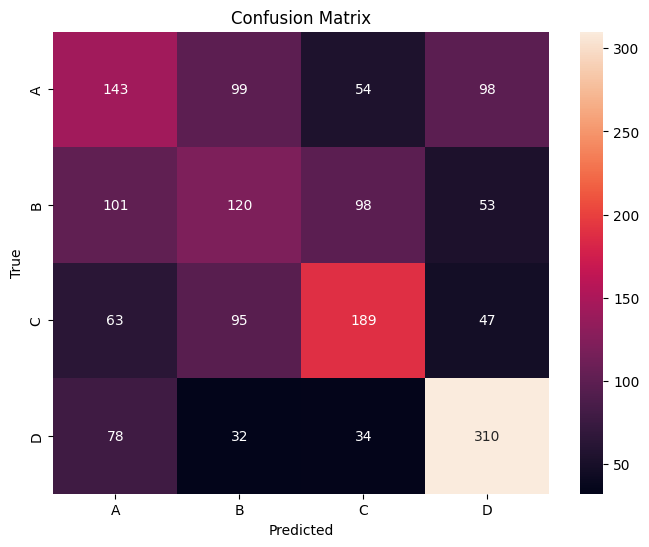

In [59]:
print(classification_report(y_test,predictions))


cm = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

XGB CLASSIFIER

In [60]:
model_xgb=XGBClassifier(learning_rate=0.1,random_state=42,max_depth=15,n_estimators=1000,objective="multi:softproba")
model_xgb.fit(x_train,y_train)


predictions = model_xgb.predict(x_test)


train_score = model_xgb.score(x_train, y_train)
print('Accuracy of model on train set:',train_score)

test_score = accuracy_score(y_test, predictions)
print('Accuracy of model on test set:',test_score)

Accuracy of model on train set: 0.9355438487759529
Accuracy of model on test set: 0.4634448574969021


              precision    recall  f1-score   support

           0       0.36      0.38      0.37       394
           1       0.34      0.31      0.32       372
           2       0.48      0.47      0.48       394
           3       0.63      0.66      0.64       454

    accuracy                           0.46      1614
   macro avg       0.45      0.45      0.45      1614
weighted avg       0.46      0.46      0.46      1614



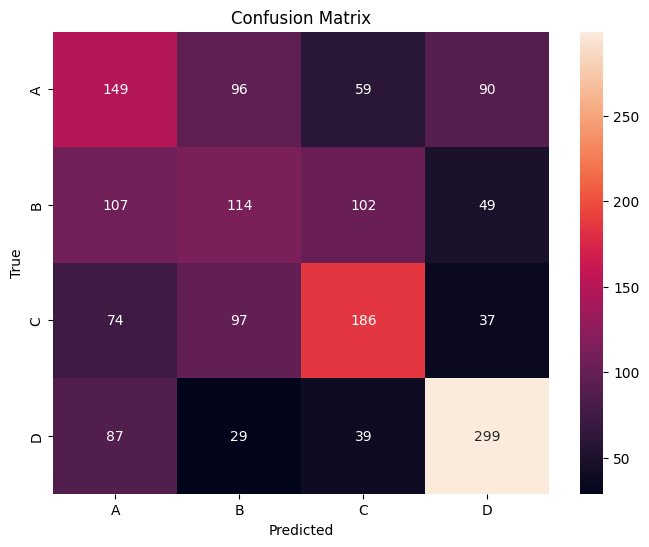

In [61]:
print(classification_report(y_test,predictions))


cm = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The model that yielded the best results in terms of accuracy in the validation set is the Random forest classifier.